In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from scipy.sparse import linalg

In [2]:
N = 100
dx = 0.001

In [3]:
left_x = 0
left_y = 0
top_x = 0
top_y = 0

In [4]:
bottom_x = top_x
bottom_y = top_y
right_x = left_x
right_y = left_y

In [5]:
_A_1 = sparse.eye(N)
D_2 = sparse.eye(N, k=1) + sparse.eye(N, k=-1) - 2 * _A_1
D_2 = D_2.tolil()
D_2[0,-1] = 1
D_2[-1,0] = 1
L = 1 / (dx**2) * (sparse.kron(D_2, _A_1) + sparse.kron(_A_1, D_2))
b_ux = np.zeros(N**2)
b_uy = b_ux.copy()

In [6]:
yy, xx = np.mgrid[0:N, 0:N]
x = xx.flatten()
y = yy.flatten()

In [7]:
def Force_x(x, y, sigma=0.001):
    return 1 * np.exp((-((x - N / 2) ** 2) - ((y - N / 2) ** 2)) / sigma)


def Force_y(x, y, sigma=1000):
    return 0 * x  # 10000 * np.exp((-((x - N / 2) ** 2) - ((y - N / 2) ** 2)) / sigma)

In [8]:
b_ux = -Force_x(x, y) /dx
b_uy = -Force_y(x, y) / dx

In [9]:
L1 = L.copy()
L1 = L1.tolil()

In [10]:
for i in np.arange(0, N**2, N):
    L1[i] = 0
    L1[i, i] = 1
    b_ux[i] = left_x
    b_uy[i] = left_y

for i in np.arange(N - 1, N**2, N):
    L1[i] = 0
    L1[i, i] = 1
    b_ux[i] = right_x
    b_uy[i] = right_y

for i in range(N):
    L1[i] = 0
    L1[i, i] = 1
    b_ux[i] = bottom_x
    b_uy[i] = bottom_y
    _i = -i - 1
    L1[_i] = 0
    L1[_i, _i] = 1
    b_ux[_i] = top_x
    b_uy[_i] = top_y

In [11]:
L1 = L1.tocsr()

In [12]:
u_star_x = linalg.spsolve(L1, b_ux)
u_star_y = linalg.spsolve(L1, b_uy)

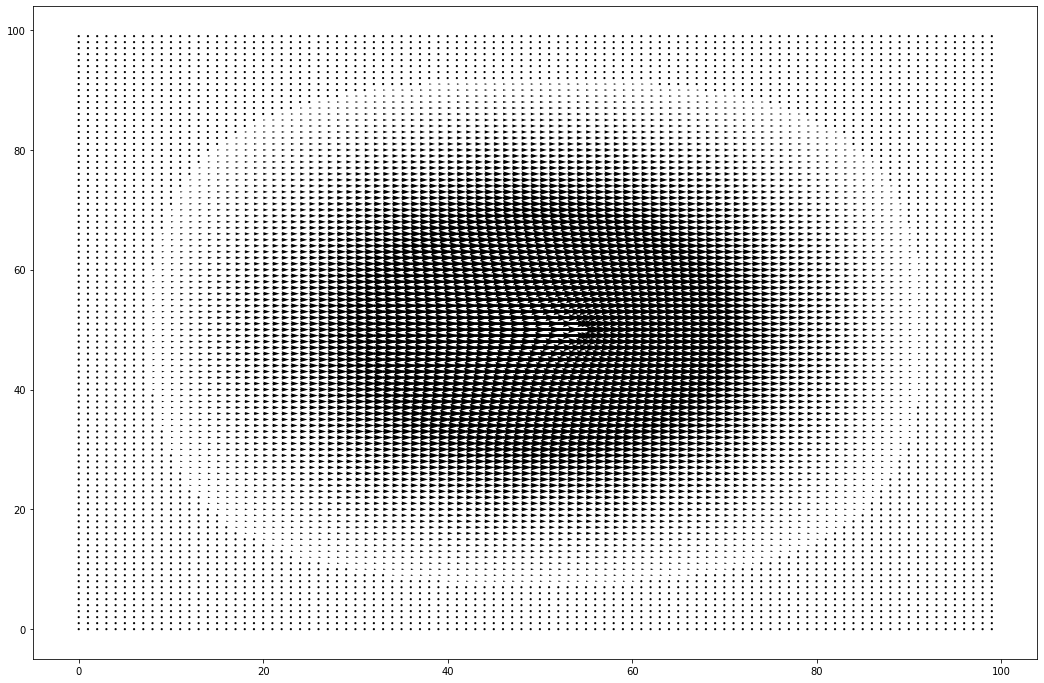

In [13]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, u_star_x, u_star_y)
plt.show()

In [14]:
D1 = 0.5 * sparse.eye(N, k=1) - 0.5 * sparse.eye(N, k=-1)
D1 = D1.tolil()
D1[0, 0] = -1
D1[0, 1] = 1
D1[-1, -1] = 1
D1[-1, -2] = -1
D1 /= dx
Dx = sparse.kron(sparse.eye(N), D1)
Dy = sparse.kron(D1, sparse.eye(N))

In [15]:
DXX = Dx @ u_star_x
DYY = Dy @ u_star_y

In [16]:
phi = linalg.spsolve(L, (-(DXX + DYY)))

In [17]:
dphi = [Dx @ phi, Dy @ phi]

In [18]:
ux = u_star_x + dphi[0]
uy = u_star_y + dphi[1]

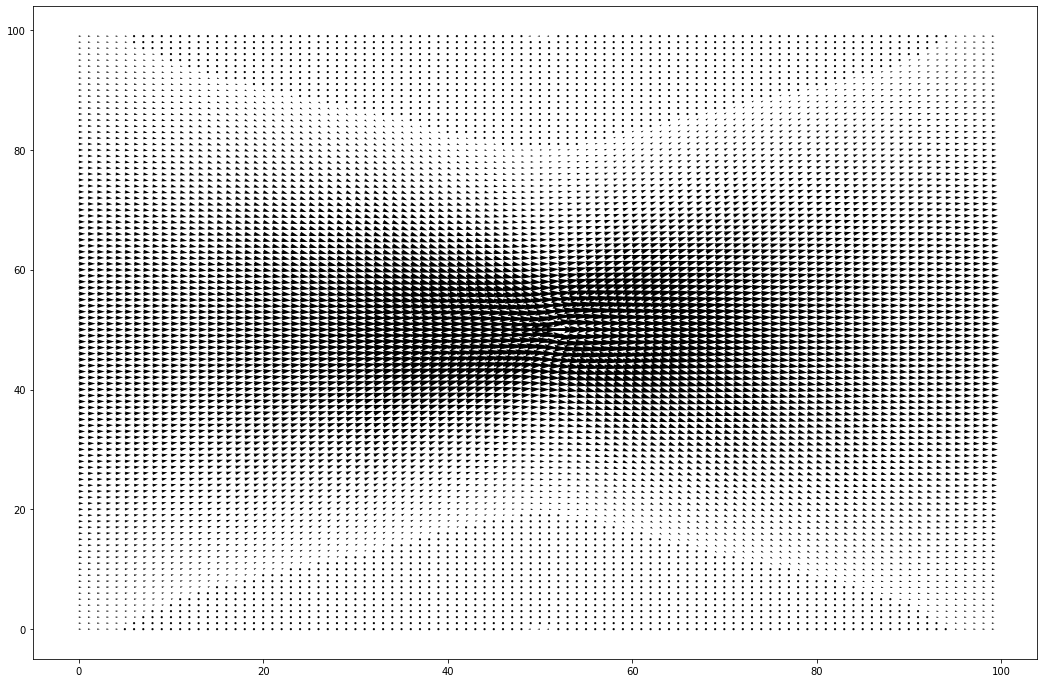

In [19]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, ux, uy)
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

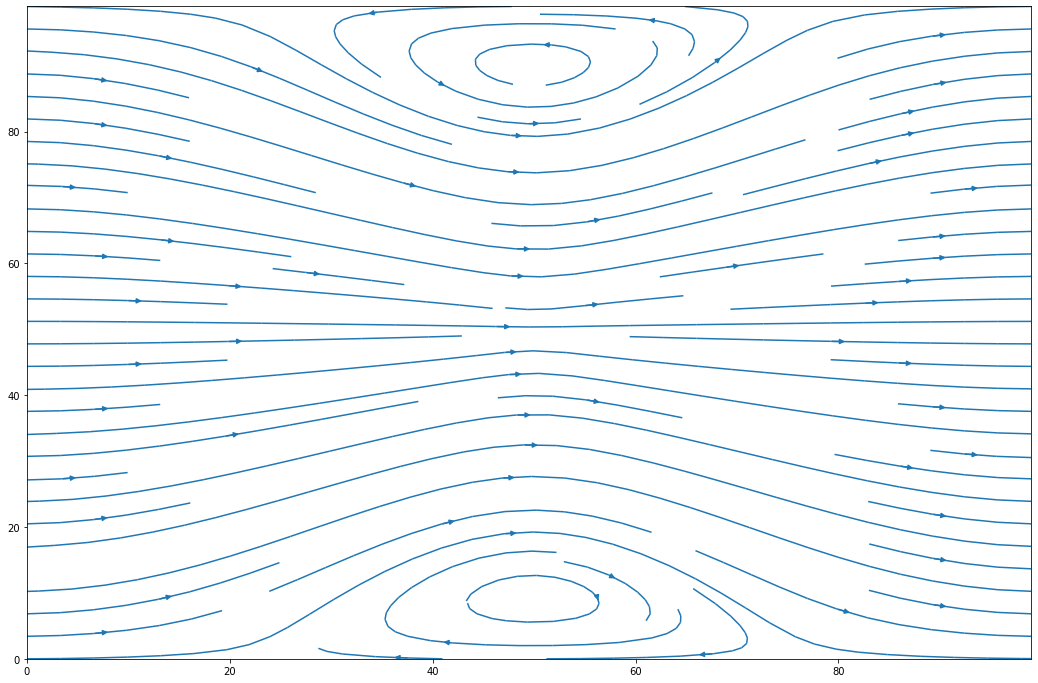

In [20]:
plt.figure(figsize=(18, 12))
# plt.quiver(xx, yy, ux, uy)
plt.streamplot(xx, yy, ux.reshape(N, N), uy.reshape(N, N))
plt.show()

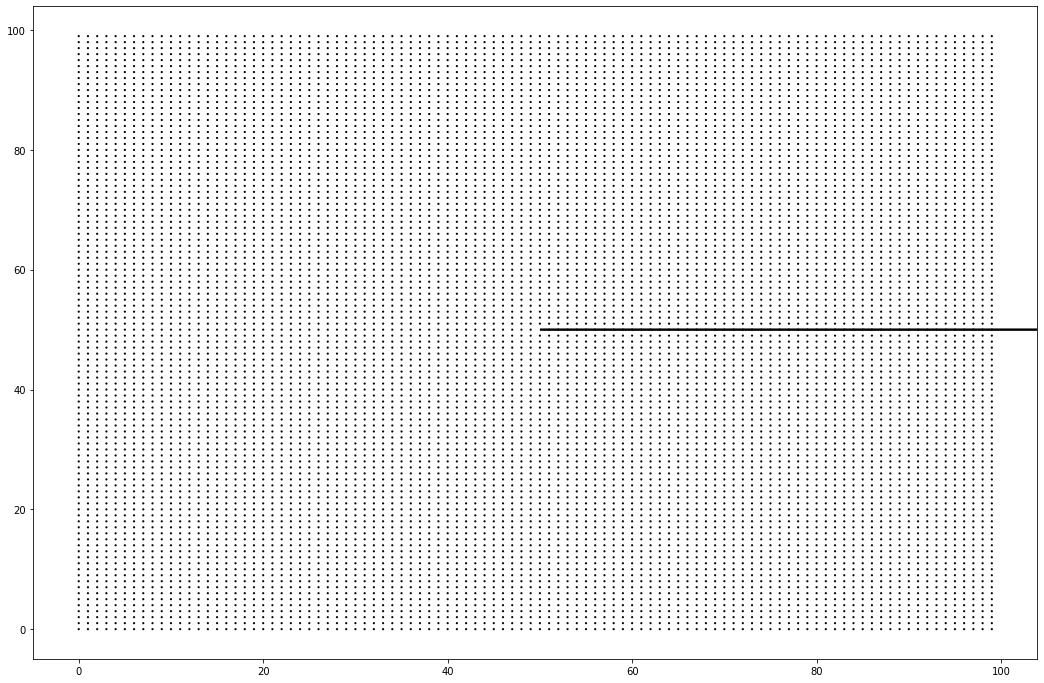

In [21]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, Force_x(x, y), Force_y(x, y))
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

In [22]:
r = np.sqrt((x - N / 2) ** 2 + (y - N / 2) ** 2)

In [23]:
J_x = (1 / np.abs(r)+ (x * x) / (np.abs(r) ** 4))
J_y = (x * y) / (np.abs(r) ** 4)

/tmp/ipykernel_36764/1410329210.py:1: RuntimeWarning: divide by zero encountered in true_divide
  J_x = (1 / np.abs(r)**2 + (x * x) / (np.abs(r) ** 4))
/tmp/ipykernel_36764/1410329210.py:2: RuntimeWarning: divide by zero encountered in true_divide
  J_y = (x * y) / (np.abs(r) ** 4)


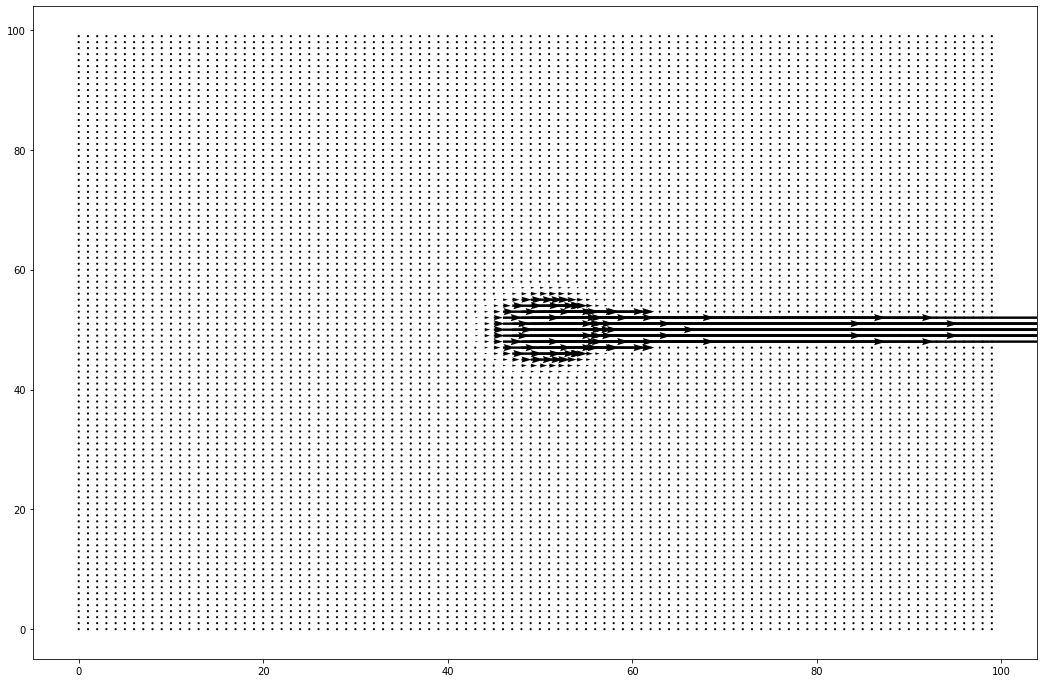

In [25]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, J_x, Force_y(x,y))
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()